In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the directories
no_ins_dir = 'responses/no_ins'
with_ins_dir = 'responses/with_ins'

# Function to read all CSV files in a directory into a dictionary of DataFrames
def read_csvs_in_dir_to_dict(directory):
    dfs = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, filename))
            dfs[filename] = df
    return dfs

# Read the CSV files
no_ins_dfs = read_csvs_in_dir_to_dict(no_ins_dir)
with_ins_dfs = read_csvs_in_dir_to_dict(with_ins_dir)

# Combine the dictionaries
dfs = {**no_ins_dfs, **with_ins_dfs}

/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

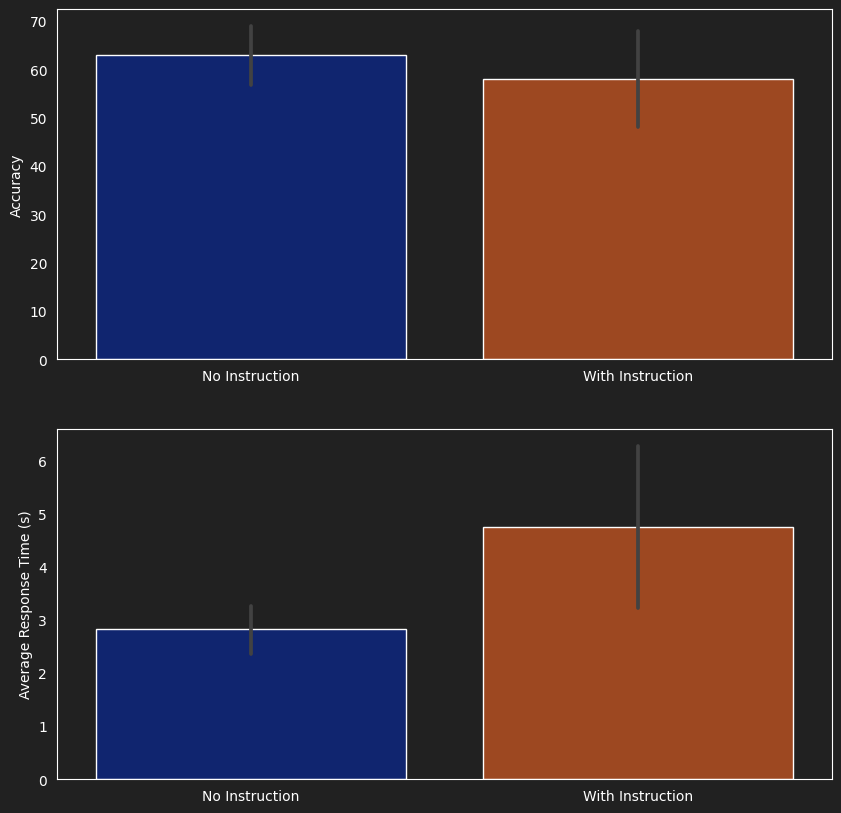

In [10]:
# Assuming that dfs is a dictionary where the key is the filename and the value is the DataFrame for that file
def create_graph(dfs):
    # Create empty lists to store data
    instruction = []
    accuracy = []
    avg_response_time = []
    std_dev = []

    # Process each DataFrame
    for filename, df in dfs.items():
        df = df[5:-2].copy()
        # Calculate accuracy and average response time
        acc = df['acc'].astype(float).iloc[-1]
        avg_time = df['avg_rt'].astype(float).iloc[-1] / 1000  # Convert ms to s
        std_time = df['response_time'].std()

        # Append data to lists
        instruction.append('With Instruction' if 'with_intro' in filename else 'No Instruction')
        accuracy.append(acc)
        avg_response_time.append(avg_time)
        std_dev.append(std_time)

    # Create a DataFrame from the lists
    plot_df = pd.DataFrame({
        'Instruction': instruction,
        'Accuracy': accuracy,
        'Average Response Time': avg_response_time,
        'Standard Deviation': std_dev
    })

    fig, axs = plt.subplots(2,1,figsize=(10, 10))  # Notice the change from 'ax' to 'axs'
    sns.set_style("dark")
    sns.set_palette('dark')
    sns.barplot(x='Instruction', y='Accuracy', data=plot_df, ax=axs[0])  # Notice the change from 'ax' to 'axs'
    sns.barplot(x='Instruction', y='Average Response Time', data=plot_df, ax=axs[1])  # Notice the change from 'ax' to 'axs'
    
    # Remove x labels
    axs[0].set_xlabel('')  # Notice the change from 'ax' to 'axs'
    axs[1].set_xlabel('')  # Notice the change from 'ax' to 'axs'
    axs[1].set_ylabel('Average Response Time (s)')  # Notice the change from 'ax' to 'axs'
    
    # Set the background color
    fig.patch.set_facecolor('#212121')
    axs[0].set_facecolor('#212121')  # Notice the change from 'ax' to 'axs'
    axs[1].set_facecolor('#212121')  # Notice the change from 'ax' to 'axs'
    
    # Set the color of the text
    for ax in fig.axes:
        ax.tick_params(color='white', labelcolor='white')
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
    
    plt.savefig('plot.png')
    plt.show()


    
# Call the function with your dictionary of DataFrames
create_graph(dfs)